## Dependencies

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [2]:
data = pd.read_csv('../../data/processed/heart_processed.csv')

In [3]:
data.dtypes

age                            int64
sex                           object
chest_pain_type               object
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar           object
resting_electrocardiogram     object
max_heart_rate_achieved        int64
exercise_induced_angina       object
st_depression                float64
st_slope                      object
num_major_vessels              int64
thalassemia                   object
target                         int64
dtype: object

There are three datatypes, i.e, object, int and float. Let's group them according to their types.

In [4]:
# numerical fearures
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']

# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']

# caterorical (multi-)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']

cat_feats = nom_feats + bin_feats

## Target distribution

In [5]:
data['target'].value_counts()

target
1    160
0    136
Name: count, dtype: int64

In [6]:
data['target'].value_counts(normalize=True)

target
1    0.540541
0    0.459459
Name: proportion, dtype: float64

We observe that the target is fairly balanced with ~46% with no heart disease and ~54% with heart disease. So no need to worry about target imbalance.

## Feature distributions

### Numerical features

In [7]:
data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


#### Summary of numerical features

<div style="max-width: 700px; margin: 24px auto; background-color: #2c3e50; color: #ecf0f1; padding: 20px; border-radius: 12px; font-family: Arial, sans-serif; line-height: 1.6;">

  <h5 style="color:#f39c12;">Age</h5>
  <ul>
    <li>The average age in the dataset is <b>54.5 years</b></li>
    <li>The oldest is <b>77 years</b>, whereas the youngest is <b>29 years</b></li>
  </ul>

  <h5 style="color:#f39c12;">Cholesterol</h5>
  <ul>
    <li>The average registered cholesterol level is <b>247.15</b></li>
    <li>Maximum level is <b>564</b> and the minimum level is <b>126</b></li>
    <li>A healthy cholesterol level is <b>&lt;200 mg/dl</b>, and usually high levels are associated with heart disease</li>
  </ul>

  <h5 style="color:#f39c12;">Resting blood pressure</h5>
  <ul>
    <li>Mean: <b>131</b>, Max: <b>200</b>, Min: <b>94</b></li>
  </ul>

  <h5 style="color:#f39c12;">Max heart rate achieved</h5>
  <ul>
    <li>The average max heart rate registered is <b>149.5 bpm</b></li>
    <li>Maximum: <b>202 bpm</b>, Minimum: <b>71 bpm</b></li>
  </ul>

  <h5 style="color:#f39c12;">ST depression</h5>
  <ul>
    <li>The average value of ST depression is <b>1.06</b></li>
    <li>Maximum: <b>6.2</b>, Minimum: <b>0</b></li>
  </ul>

  <h5 style="color:#f39c12;">Number of major blood vessels</h5>
  <ul>
    <li>Maximum: <b>3</b>, Minimum: <b>0</b>, Mean: <b>0.68</b></li>
  </ul>

</div>

#### Density plots

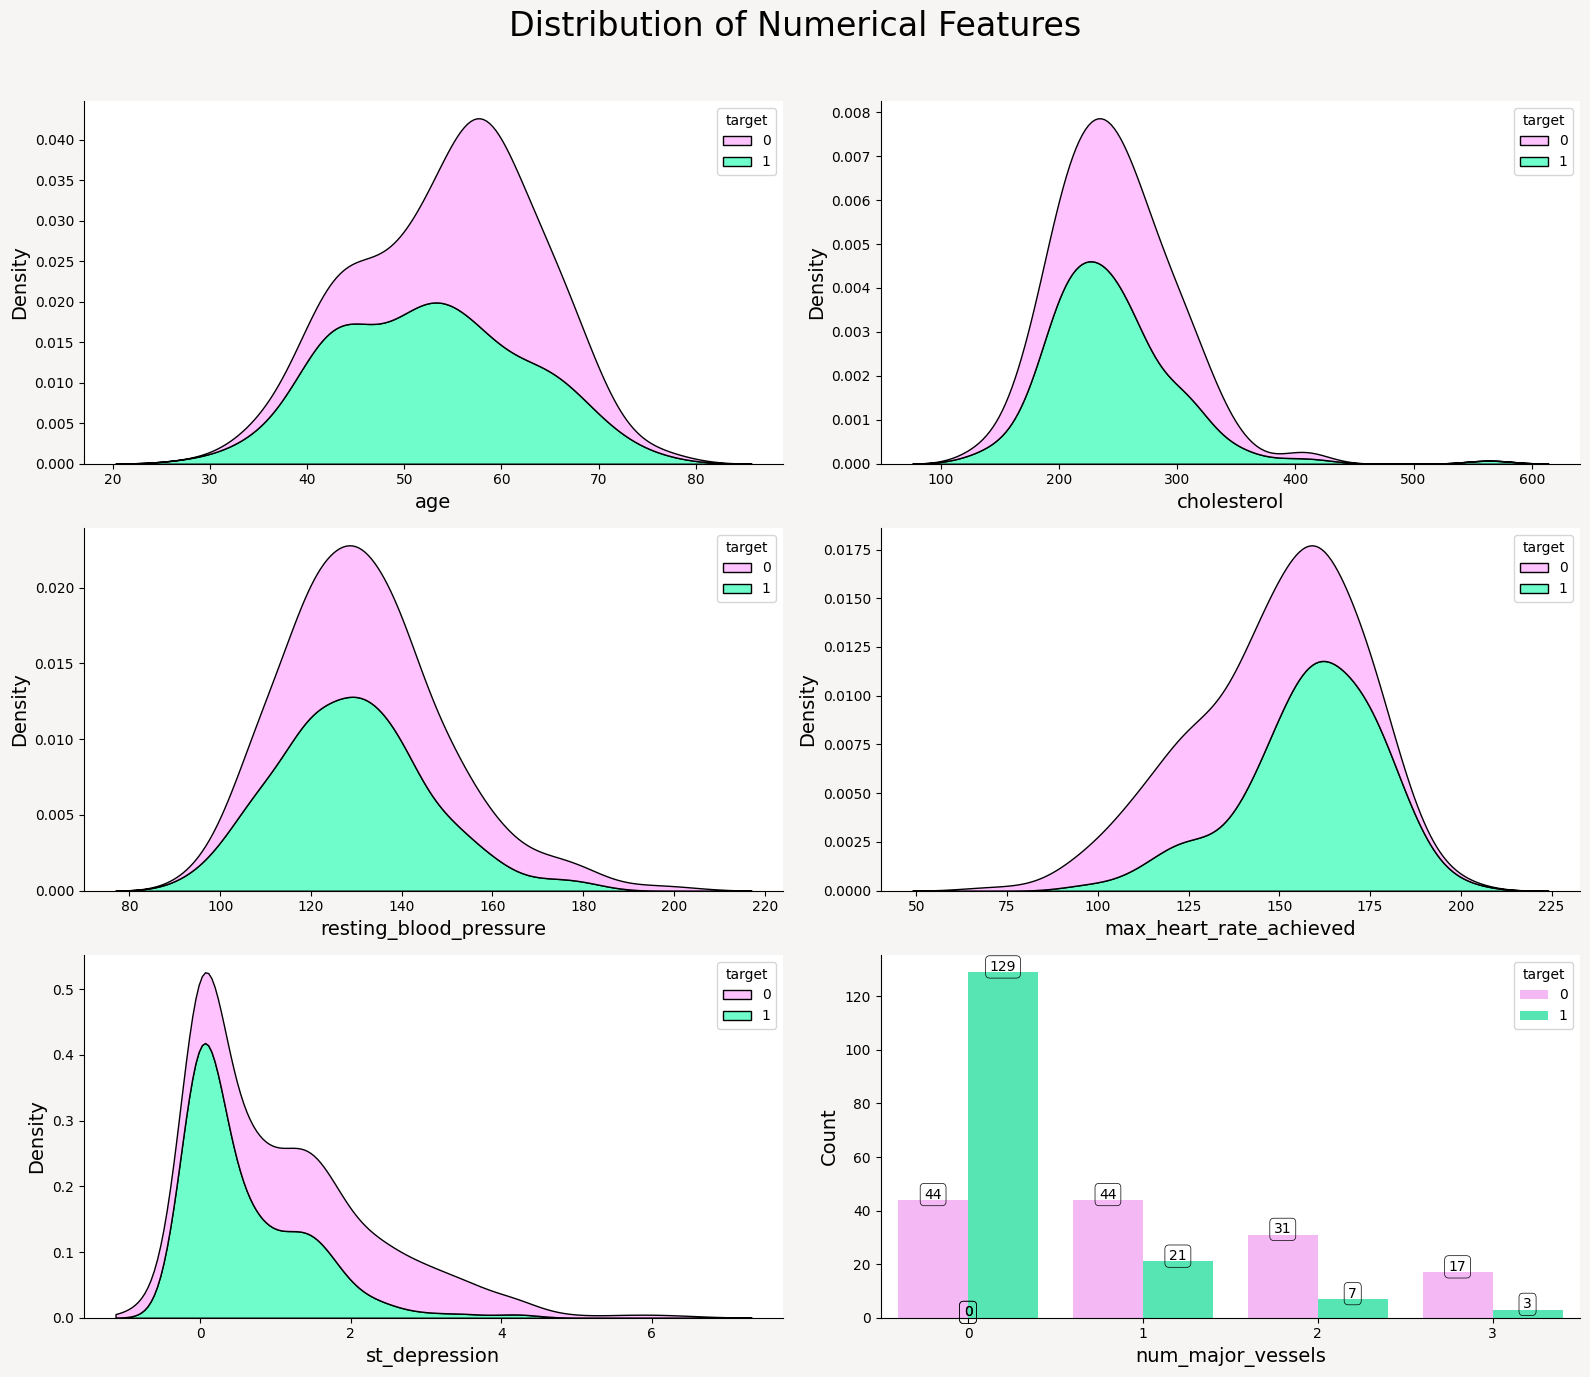

In [8]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

L = len(num_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axes = plt.subplots(nrow, ncol, figsize=(16, 14), facecolor='#F6F5F4')
axes = axes.flatten()  # flatten to easily index in a loop

for i, col in enumerate(num_feats):
    ax = axes[i]
    
    if col == 'num_major_vessels':
        sns.countplot(data=data, x=col, hue='target', palette=mypal[1::4], ax=ax)
        # Add text labels on top of bars
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2., height + 0.5,
                    f'{int(height)}', ha='center', fontsize=10,
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        ax.set_ylabel('Count', fontsize=14)
    else:
        sns.kdeplot(data=data, x=col, hue='target', multiple='stack', palette=mypal[1::4], ax=ax)
        ax.set_ylabel('Density', fontsize=14)
    
    ax.set_xlabel(col, fontsize=14)
    sns.despine(ax=ax, right=True)

# Remove empty subplots if any
for j in range(L, nrow*ncol):
    fig.delaxes(axes[j])

plt.suptitle('Distribution of Numerical Features', fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.savefig('../../results/figures/numerical_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

#### Pairplots

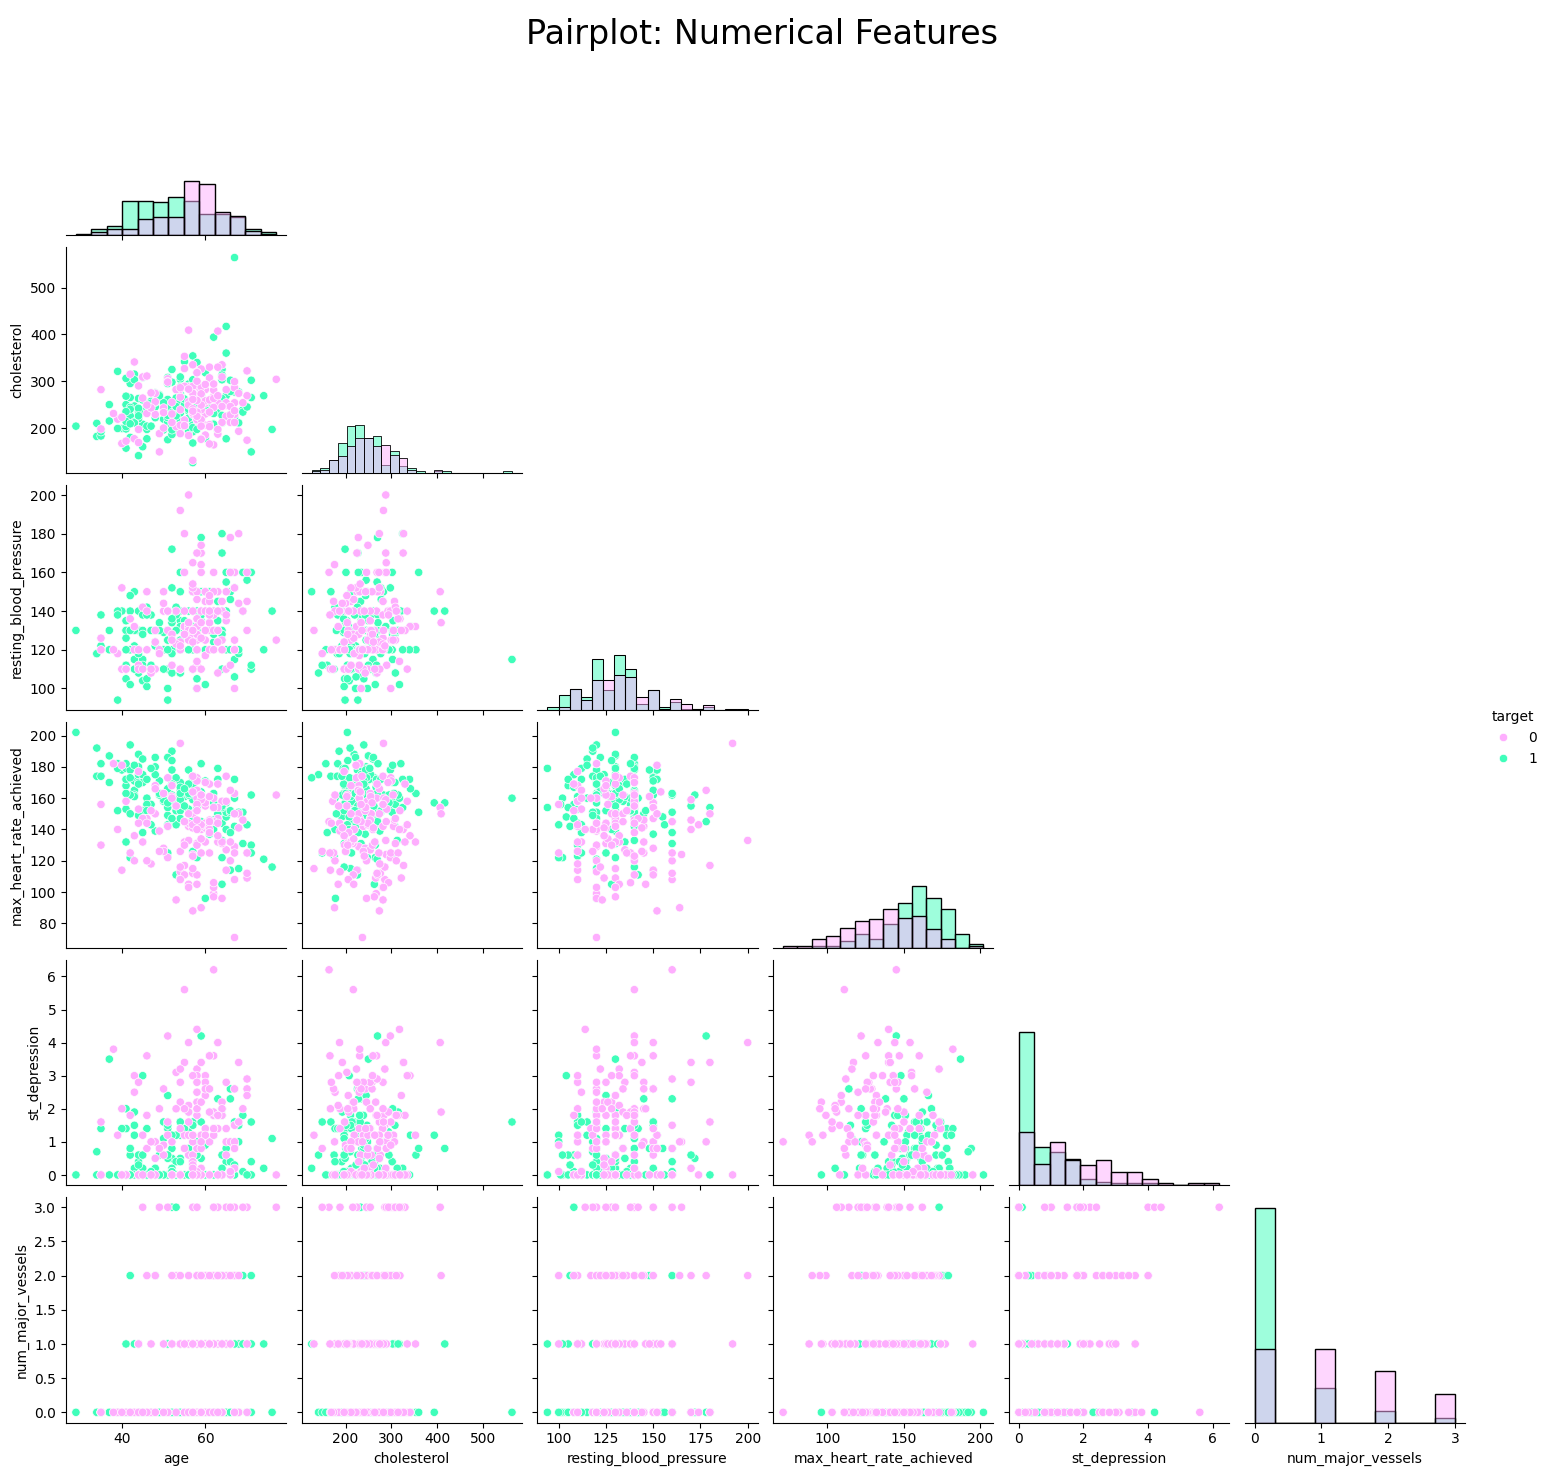

In [9]:
g = sns.pairplot(data[num_feats + ['target']], hue="target", corner=True, diag_kind='hist', palette=mypal[1::4])
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24)
g.savefig('../../results/figures/pairplot_numerical_features.png', dpi=300, bbox_inches='tight')
plt.show()

### Categorical features

In [10]:
def count_plot(data, cat_feats):    
    L = len(cat_feats)
    ncol = 2
    nrow = int(np.ceil(L/ncol))
    remove_last = (nrow * ncol) - L
    
    fig, axes = plt.subplots(nrow, ncol, figsize=(18, 24), facecolor='#F6F5F4')    
    fig.subplots_adjust(top=0.92)
    
    # Handle case where there's only one subplot
    if nrow == 1 and ncol == 1:
        axes = [axes]
    elif nrow == 1 or ncol == 1:
        axes = axes.flatten()
    else:
        axes = axes.flatten()
    
    # Hide unused subplots
    if remove_last > 0:
        for j in range(remove_last):
            axes[-(j+1)].set_visible(False)
    
    for i, col in enumerate(cat_feats):
        ax = axes[i]  # Use the specific axis
        
        # Check if column exists and has valid data
        if col not in data.columns:
            print(f"Warning: Column '{col}' not found in data")
            continue
            
        if "target" not in data.columns:
            print("Warning: 'target' column not found in data")
            return None
            
        # Create countplot on the specific axis
        sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4], ax=ax)
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        
        # Apply styling
        sns.despine(right=True, ax=ax)
        sns.despine(offset=0, trim=False, ax=ax) 
        
        # Add legend with styling
        legend = ax.legend(facecolor='#F6F5F4')
        if legend:
            legend.set_frame_on(True)
        
        # Add value labels on bars
        for p in ax.patches:
            height = p.get_height()
            if height > 0:  # Only add text for non-zero bars
                ax.text(p.get_x() + p.get_width()/2., height + 3, 
                       '{:1.0f}'.format(height), ha="center",
                       bbox=dict(facecolor='none', edgecolor='black', 
                               boxstyle='round', linewidth=0.5))
    
    plt.suptitle('Distribution of Categorical Features', fontsize=24)
    plt.tight_layout()
    fig.savefig('../../results/figures/categorical_features_distribution.png', dpi=300, bbox_inches='tight')
    return fig

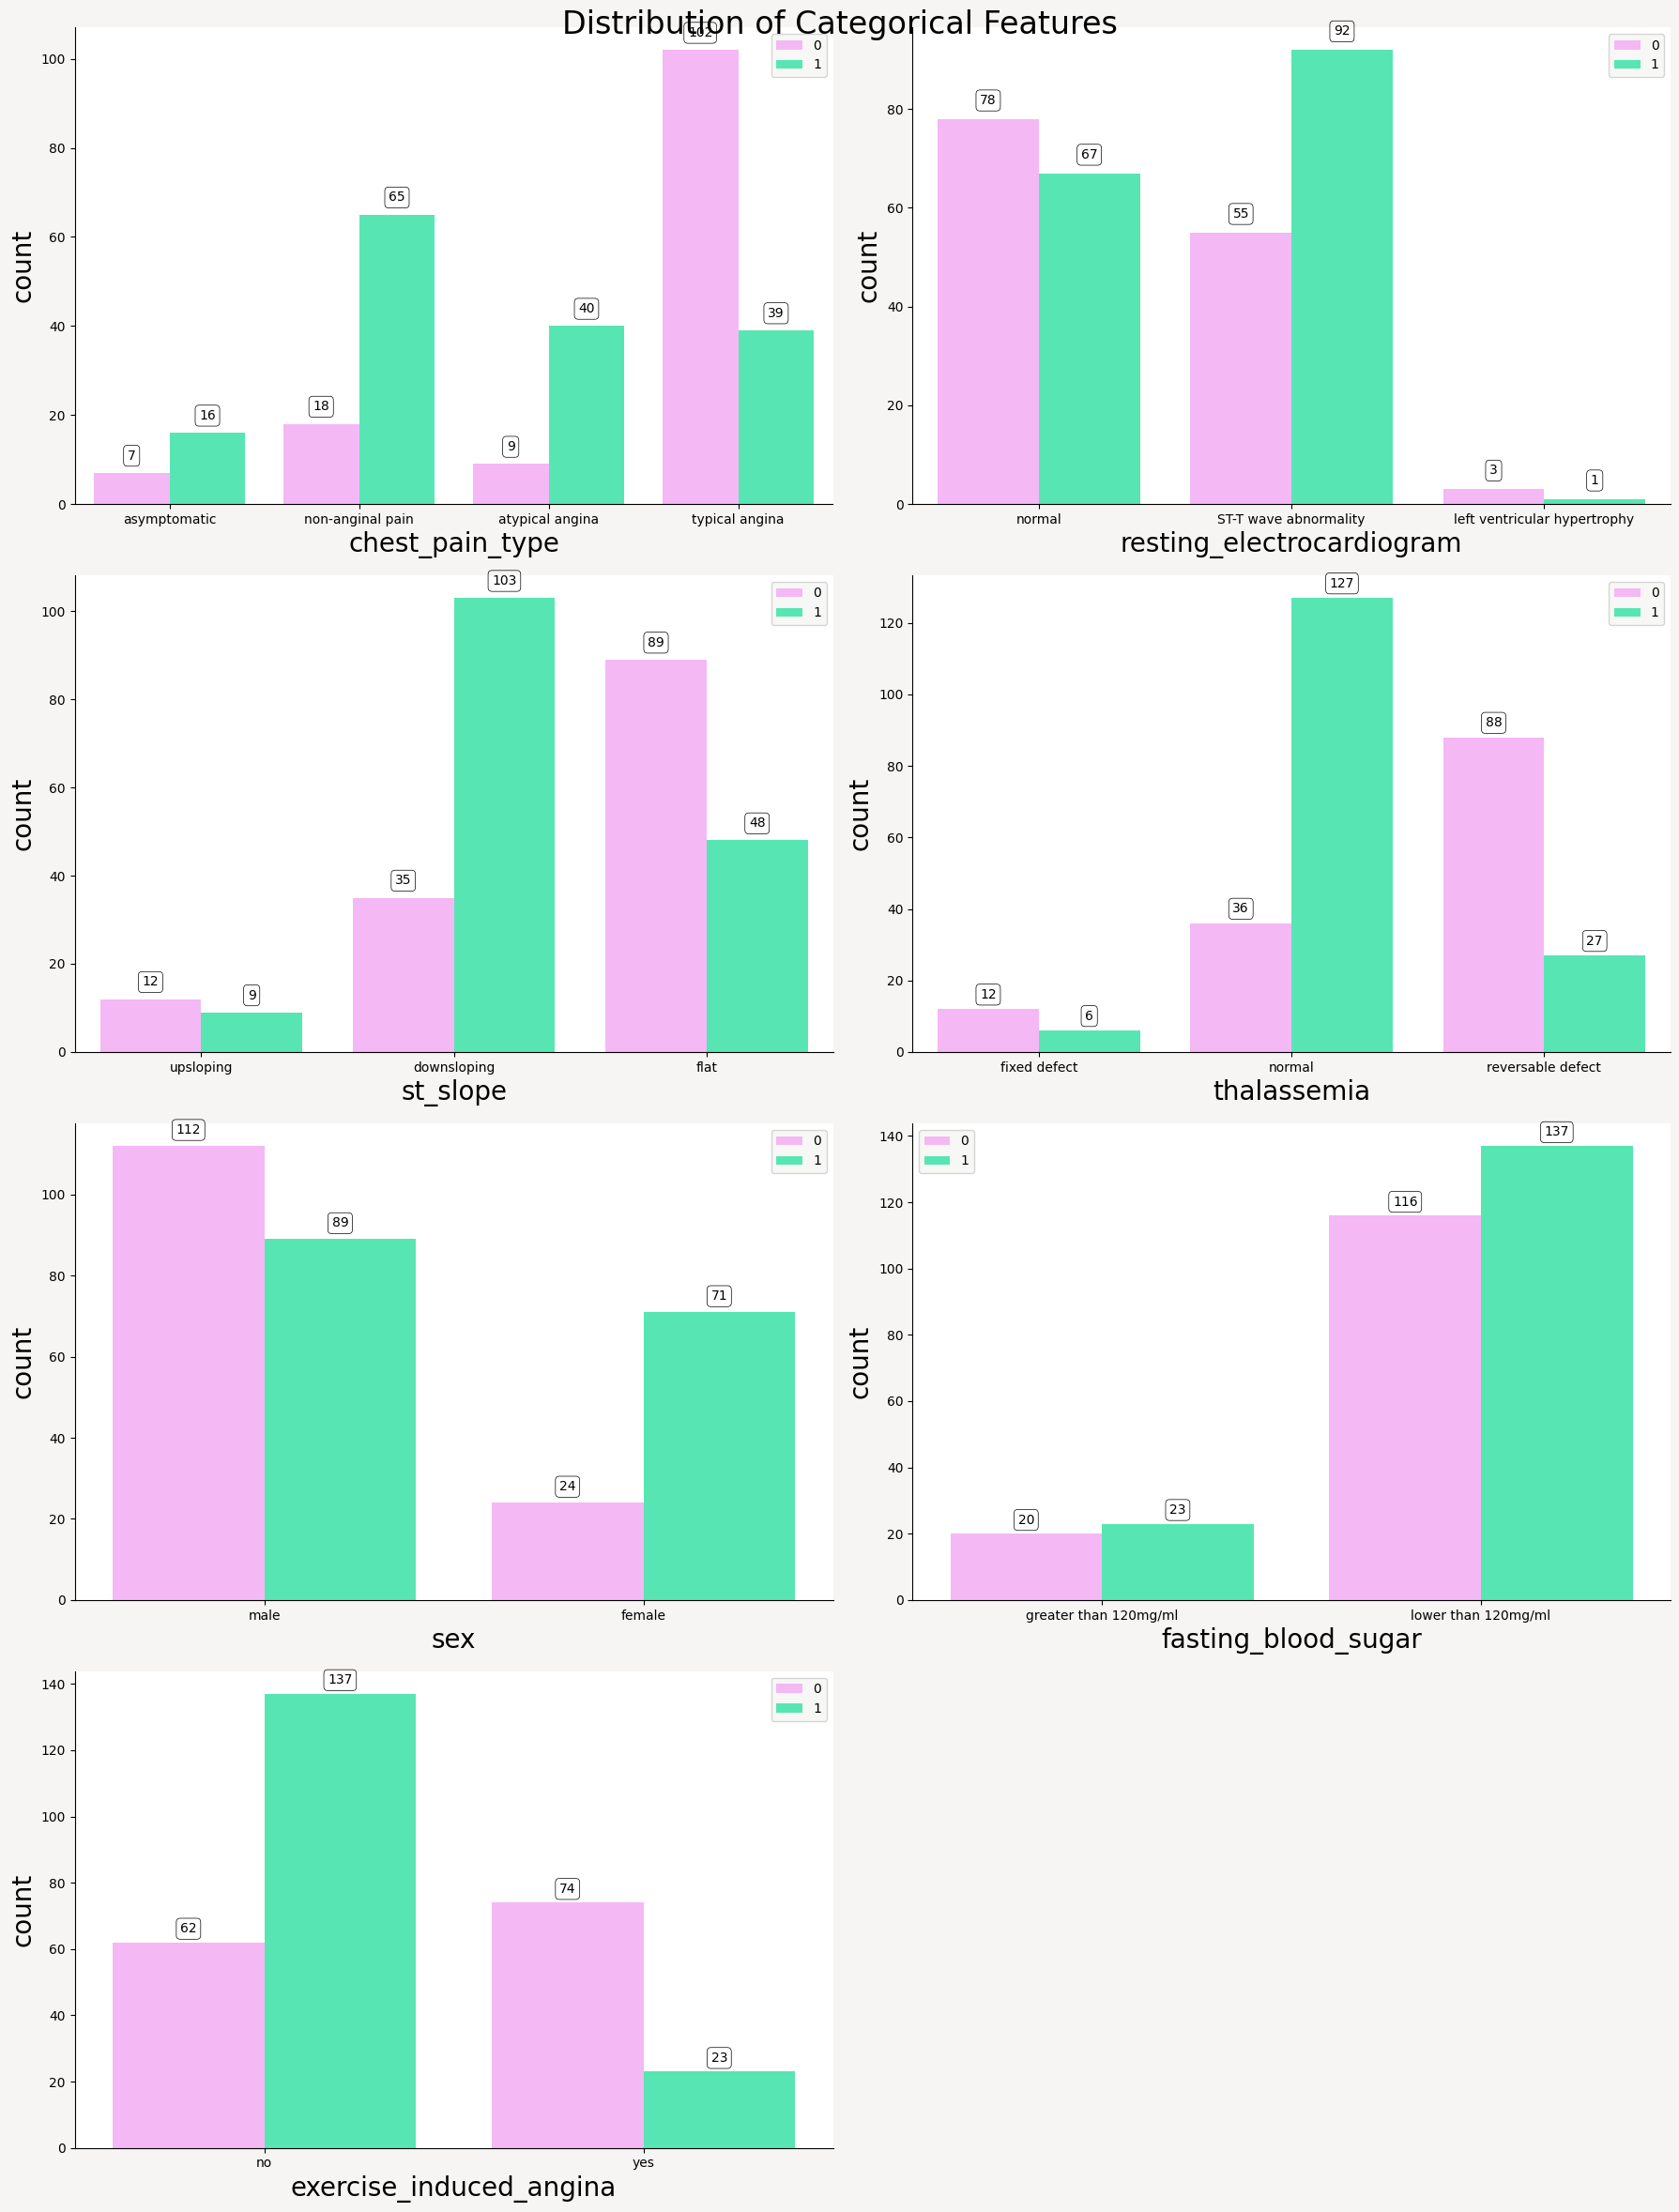

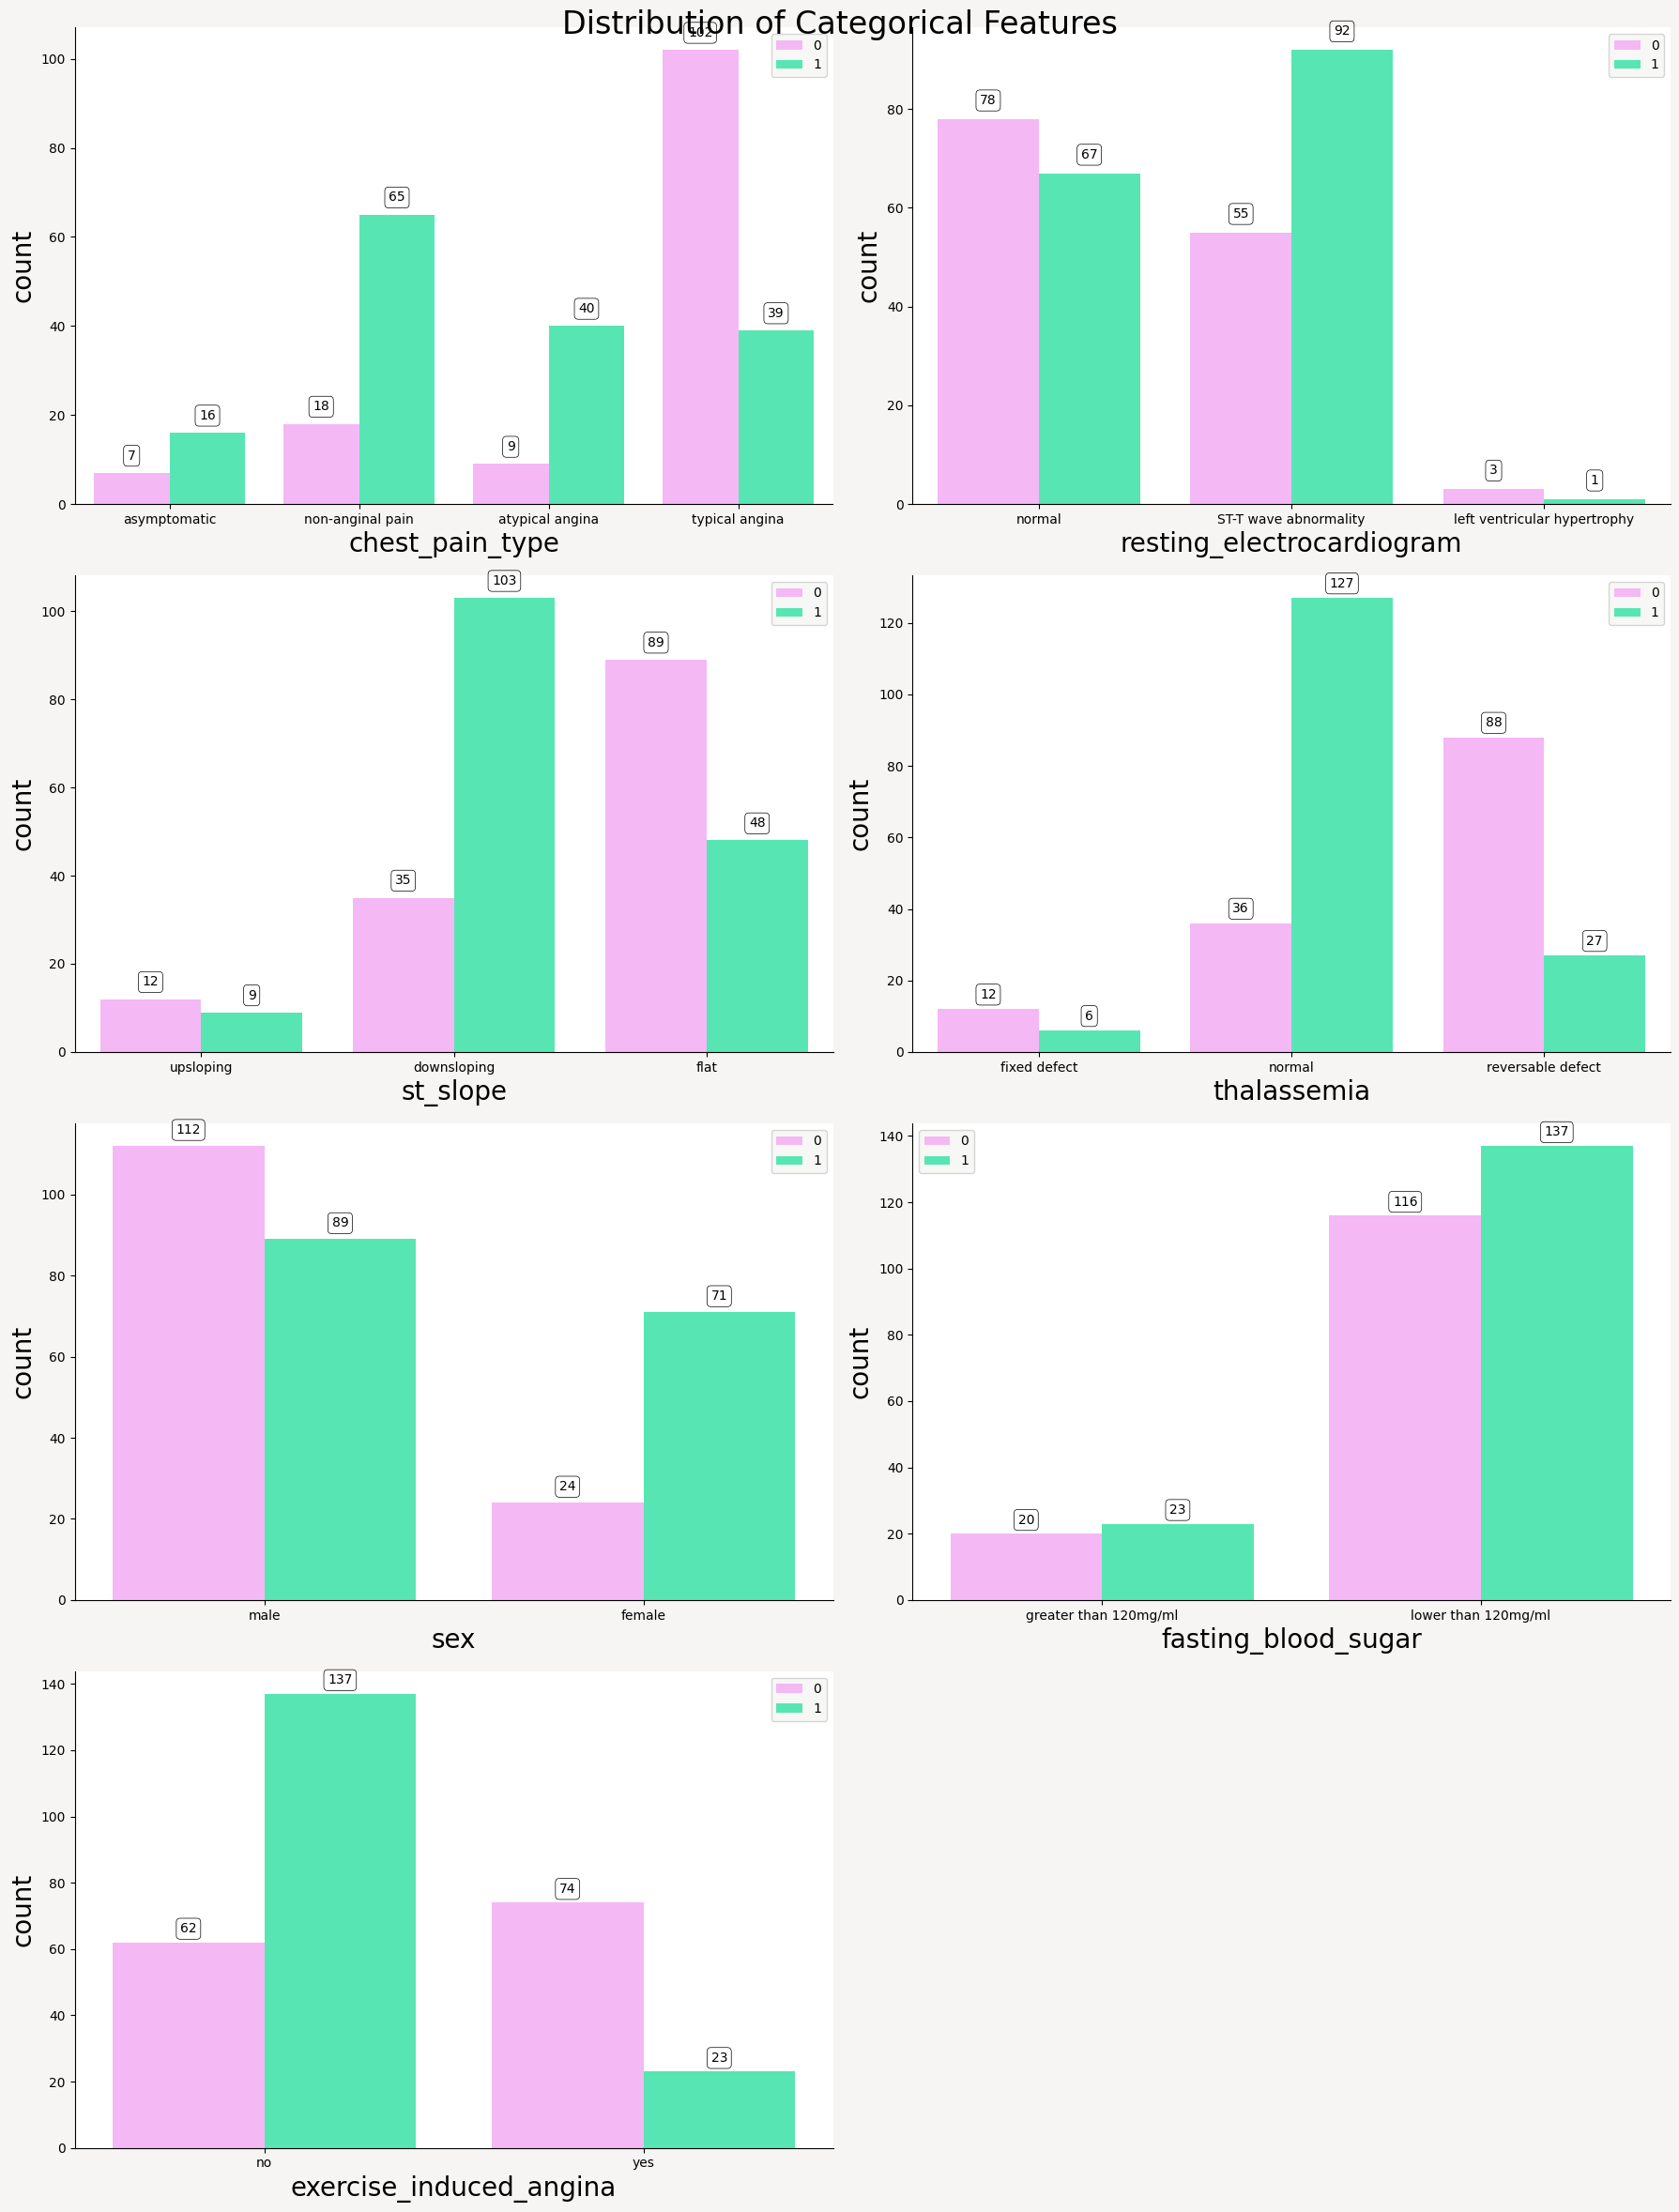

In [11]:
count_plot(data, cat_feats[0:-1])

#### Summary of categorical features

<div style="max-width: 700px; margin: 24px auto; background-color: #2c3e50; color: #ecf0f1; padding: 20px; border-radius: 12px; font-family: Arial, sans-serif; line-height: 1.6;">

  <h5 style="color:#f39c12;">Chest Pain</h5>
  <ul>
    <li>More than 75% of patients experience either <b>typical angina</b> or <b>non-angina</b> chest pain</li>
    <li>Patients with <b>atypical angina</b> or <b>non-angina</b> chest pain are more likely to have heart disease</li>
  </ul>

  <h5 style="color:#f39c12;">Resting Electrocardiogram</h5>
  <ul>
    <li>Patients with <b>Left ventricular hypertrophy</b> are the fewest (~1.4%)</li>
    <li>The rest are almost a 50-50 split between <b>ST-T abnormality</b> and <b>normal</b> ECG results</li>
    <li><b>ST-T abnormality</b> correlates more with heart disease</li>
  </ul>

  <h5 style="color:#f39c12;">ST-Slope</h5>
  <ul>
    <li>Most patients have a <b>downsloping</b> or <b>flat</b> ST-Slope</li>
    <li><b>Downsloping</b> ST-Slope is a strong indicator of heart disease</li>
  </ul>

  <h5 style="color:#f39c12;">Thalassemia</h5>
  <ul>
    <li>Most patients have <b>normal</b> or <b>reversable defect</b></li>
    <li>Patients with <b>reversable + fixed defects</b> are less likely to have heart disease</li>
    <li>Those with <b>normal thalassemia</b> are more likely to have heart disease (counterintuitive)</li>
  </ul>

  <h5 style="color:#f39c12;">Fasting Blood Sugar</h5>
  <ul>
    <li>~85% of patients have <b>&lt;120 mg/ml</b> fasting blood sugar</li>
    <li>Lower fasting blood sugar is associated with a ~54% chance of heart disease</li>
  </ul>

  <h5 style="color:#f39c12;">Exercise Induced Angina</h5>
  <ul>
    <li>Two-thirds of patients showed <b>no exercise induced angina</b></li>
    <li>76% with angina had <b>no heart disease</b>, whereas ~69% without angina were diagnosed with heart disease</li>
  </ul>

  <h5 style="color:#f39c12;">Sex</h5>
  <ul>
    <li>More patients are <b>male</b></li>
    <li><b>Females</b> appear more likely to suffer from heart disease</li>
  </ul>

</div>


## Correlation

### Pearson's r

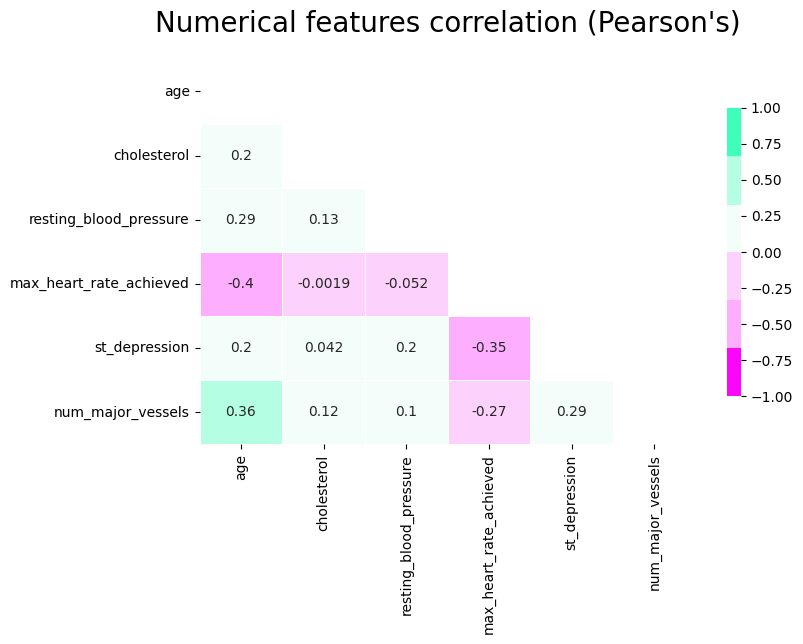

In [12]:
df_ = data[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation (Pearson's)", fontsize=20, y= 1.05)
f.savefig('../../results/figures/numerical_features_correlation.png', dpi=300, bbox_inches='tight')

plt.show()

### Point biserial correlation

A point-biserial correlation is used to measure the strength and direction of the association that exists between one continuous variable and one dichotomous variable.

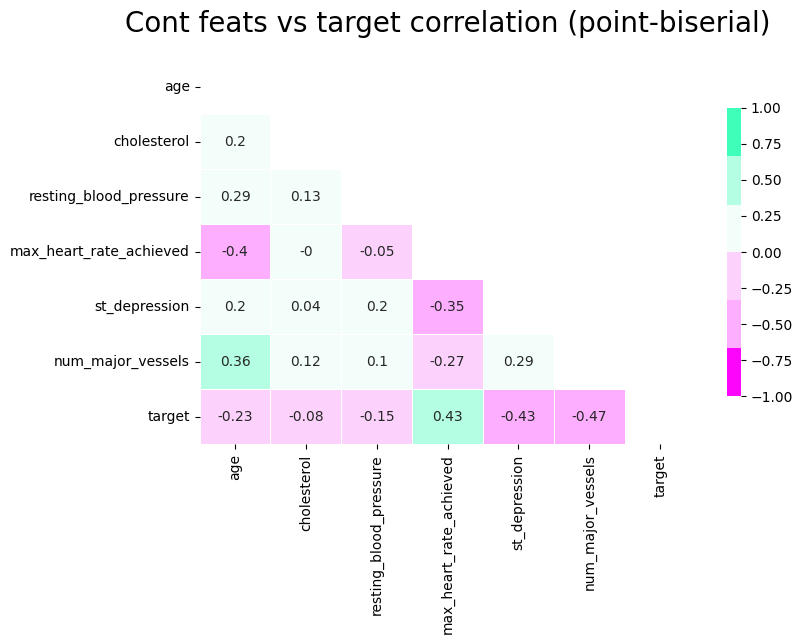

In [13]:
feats_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels', 'target']

def point_biserial(x, y):
    pb = stats.pointbiserialr(x, y)
    return pb[0]

rows= []
for x in feats_:
    col = []
    for y in feats_ :
        pbs =point_biserial(data[x], data[y]) 
        col.append(round(pbs,2))  
    rows.append(col)  
    
pbs_results = np.array(rows)
DF = pd.DataFrame(pbs_results, columns = data[feats_].columns, index =data[feats_].columns)

mask = np.triu(np.ones_like(DF, dtype=bool))
corr = DF.mask(mask)

f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Cont feats vs target correlation (point-biserial)", fontsize=20, y= 1.05)
f.savefig('../../results/figures/point_biserial_correlation.png', dpi=300, bbox_inches='tight')

plt.show()

### Cramer's V

Cramér's V is a measure of association between **two nominal variables**, giving a value between 0 and +1 (inclusive).

In [14]:
def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# calculate the correlation coefficients using the above function
data_ = data[cat_feats]
rows= []
for x in data_:
    col = []
    for y in data_ :
        cramers =cramers_v(data_[x], data_[y]) 
        col.append(round(cramers,2))
    rows.append(col)
    
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_.columns, index = data_.columns)

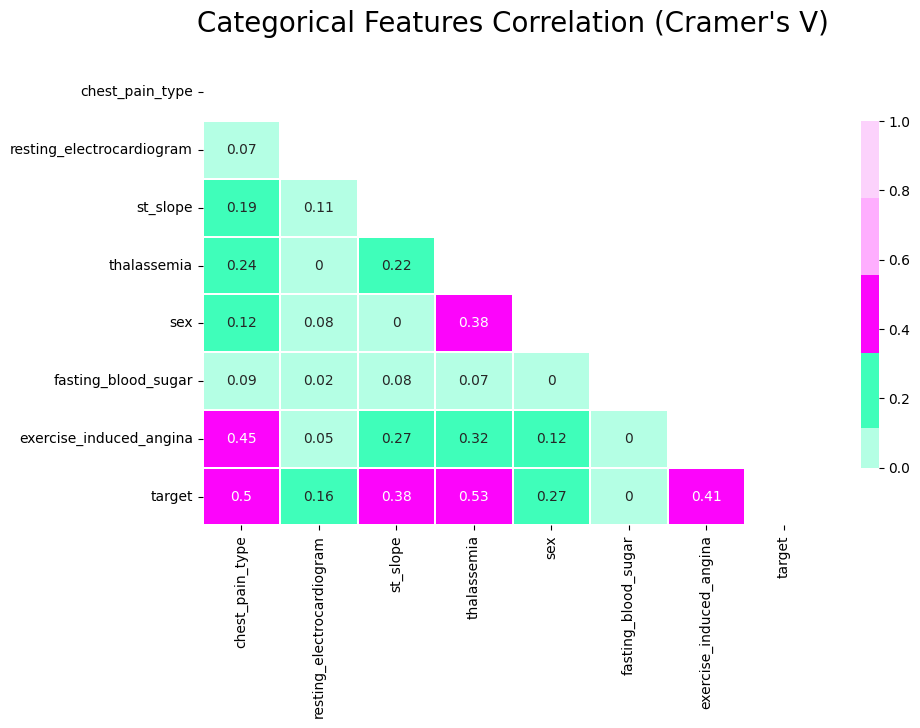

In [15]:
# color palette 
mypal_1= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA', '#FC05FB', '#FEAEFE', '#FCD2FC']

# plot the heat map
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)
f, ax = plt.subplots(figsize=(10, 6), facecolor=None)
cmap = sns.color_palette(mypal_1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=0, center=0, annot=True,
            square=False, linewidths=.01, cbar_kws={"shrink": 0.75})
ax.set_title("Categorical Features Correlation (Cramer's V)", fontsize=20, y= 1.05)
f.savefig('../../results/figures/categorical_features_cramersv.png', dpi=300, bbox_inches='tight')

plt.show()

#### Summary of correlation

<div style="max-width: 700px; margin: 24px auto; background-color: #2c3e50; color: #ecf0f1; padding: 20px; border-radius: 12px; font-family: Arial, sans-serif; line-height: 1.6;">

  <h5 style="color:#f39c12;">Overall Correlations</h5>
  <ul>
    <li>Correlation between features is generally <b>weak</b></li>
  </ul>

  <h5 style="color:#f39c12;">Numerical Features</h5>
  <ul>
    <li><b>num_major_vessels</b>: -0.47 correlation with target</li>
    <li><b>max_heart_rate_achieved</b>: 0.43 correlation with target</li>
    <li><b>st_depression</b>: -0.43 correlation with target</li>
  </ul>

  <h5 style="color:#f39c12;">Categorical Features</h5>
  <ul>
    <li><b>chest_pain_type</b>, <b>num_major_vessels</b>, <b>thalassemia</b>, and <b>exercise_induced_angina</b> show stronger correlations with target</li>
    <li><b>thalassemia</b> has the highest correlation at 0.52</li>
  </ul>

  <h5 style="color:#f39c12;">Cholesterol</h5>
  <ul>
    <li>Surprisingly, <b>cholesterol</b> has little correlation with heart disease</li>
  </ul>

</div>